   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

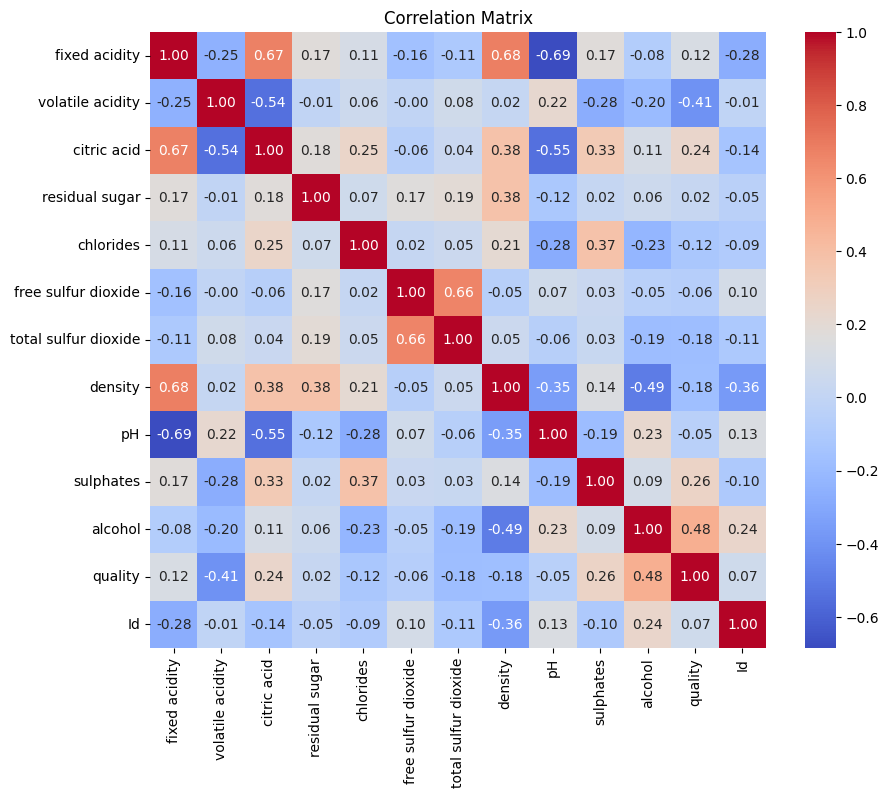

Accuracy of RandomForestClassifier: 0.6812
[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 69  5  1]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229

Accuracy of Pipeline: 0.5852
[[ 0  2  4  0  0]
 [ 0 75 12  8  1]
 [ 0 31 39 29  0]
 [ 0  2  4 20  0]
 [ 0  0  0  2  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0

C:\Users\SACHIN KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SACHIN KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SACHIN KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = r"C:\Users\SACHIN KUMAR\OneDrive\Desktop\data analytics\6th\WineQT.csv"  # Use r for raw string
df = pd.read_csv(url)

# Data exploration
print(df.head())
print(df.info())
print(df.describe())

# Data visualization: Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting the data into features and target
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model)

# Stochastic Gradient Descent Classifier
sgd_model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=42))
])
evaluate_model(sgd_model)

# Support Vector Classifier
svc_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])
evaluate_model(svc_model)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
